In [1]:
#Loading Libraries
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
%matplotlib inline

import math
from math import log

In [2]:
#Loading dataset
data = pd.read_csv("Overall_Dataset_Full2011.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771725 entries, 0 to 771724
Data columns (total 11 columns):
price           771725 non-null object
productId       771725 non-null object
title           771725 non-null object
review          771725 non-null object
profileName     771725 non-null object
score           771725 non-null float64
summary         771725 non-null object
text            771725 non-null object
userId          771725 non-null object
purchasedate    771725 non-null object
Class           771725 non-null object
dtypes: float64(1), object(10)
memory usage: 64.8+ MB


In [6]:
np.unique(data['Class'])

array(['Arts', 'Cell_Phones_&_Accessories', 'Clothing_&_Accessories',
       'Gourmet_Foods', 'Kindle_Store', 'Office_Products', 'Shoes',
       'Software', 'Watches'], dtype=object)

In [7]:
data.shape

(771725, 11)

In [8]:
data.describe()

,score
count,771725.000000
mean,4.192584
std,1.259280
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
data.isna().sum()

price           0
productId       0
title           0
review          0
profileName     0
score           0
summary         0
text            0
userId          0
purchasedate    0
Class           0
dtype: int64

In [15]:
print("Number of Unique Products : ",len(np.unique(data['productId'])))
print("Number of Unique Customers : ",len(np.unique(data['userId'])))

Number of Unique Products :  84619
Number of Unique Customers :  265401


In [18]:
print("Number of Unique Product titles : ",len(np.unique(data['title'])))

Number of Unique Product titles :  42049


In [35]:
#Finding Missing data from price column
print("Percent of missing values in the feature - 'price' :",
      ((len(data[data['price'].str.contains('unknown')]))/(len(data)))*100, "%")

Percent of missing values in the feature - 'price' : 76.57118792315916 %


In [38]:
#Cleaning the price
data['price'] = (data['price'].str.replace('unknown', '0').astype(float))

In [72]:
data.loc[data["price"] == 0, 'Status'] = 'Missing data'
data.loc[data["price"] != 0 , 'Status'] = 'available data'

In [73]:
data.Status.count()

771725

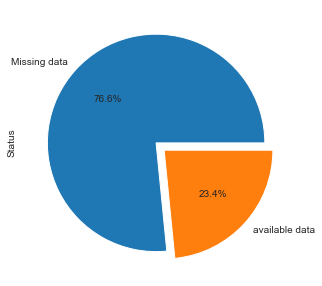

In [90]:
#Pie chart representation for the missing data distribution
plt.figure(figsize=(8, 5))
explode = (0, 0.1)
data.Status.value_counts().plot(kind='pie',explode=explode,autopct='%1.1f%%' )
plt.xticks(rotation=90)
plt.show()

In [4]:
#Datetime format
data['purchasedate'] = pd.to_datetime(data['purchasedate'])

In [5]:
#splitting into year and month
data['year'] = data['purchasedate'].dt.year
data['month'] = data['purchasedate'].dt.month

# consistency of average ratings over time

In [8]:
month_counts = data.groupby(['year', 'month'])['score'].agg([np.mean, np.std])
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)

,year,month,Rating,std
Date,,,,
2011-01-01,2011,1,4.177570,1.243892
2011-02-01,2011,2,4.080788,1.310061
2011-03-01,2011,3,4.100500,1.333105
2011-04-01,2011,4,4.201207,1.228766
2011-05-01,2011,5,4.183696,1.308233
2011-06-01,2011,6,4.011206,1.362066
2011-07-01,2011,7,4.087206,1.309117
2011-08-01,2011,8,4.096741,1.316280
2011-09-01,2011,9,4.111308,1.395645


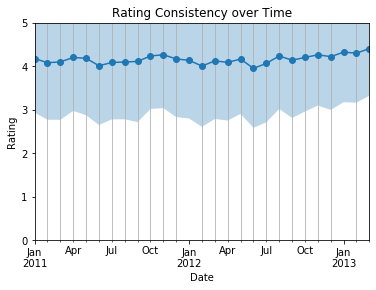

In [11]:
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)
month_counts['Rating'].plot(style='o-')
plt.fill_between(month_counts.index,
                 month_counts['Rating'] - month_counts['std'],
                 month_counts['Rating'] + month_counts['std'],
                 alpha=0.3,
                )
plt.ylim([0, 5])
plt.ylabel('Rating')
plt.gca().grid(which='minor')
plt.title('Rating Consistency over Time')
plt.show()

# How sparse is the user/products matrix ?

C:\Users\jpran\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


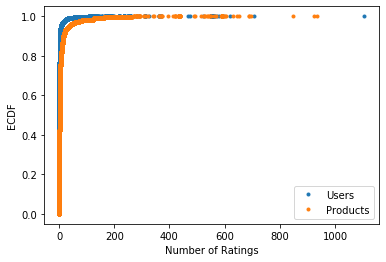

In [18]:
user_counts = data['userId'].value_counts(ascending=True)
user_counts.index = np.arange(len(user_counts)) / len(user_counts)
plt.plot(user_counts, user_counts.index, '.', label='Users')
movie_counts = data['productId'].value_counts(ascending=True)
movie_counts.index = np.arange(len(movie_counts)) / len(movie_counts)
plt.plot(movie_counts, movie_counts.index, '.', label='Products')
plt.xlabel('Number of Ratings')
plt.ylabel('ECDF')
plt.legend()
plt.show()

In [3]:
data = pd.DataFrame(data.groupby('productId').size(), columns=['count'])
data.head()

,count
productId,
0307236315,3
0310230691,1
031024837X,1
0310248396,1
0310258928,2


Text(0, 0.5, 'frequency of ratings')

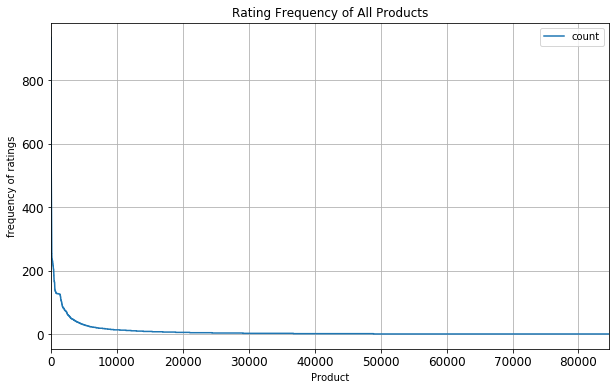

In [19]:
# plot rating frequency of all movies
ax = data.sort_values('count', ascending=False).reset_index(drop=True) 
ax.plot(figsize=(10, 6),title='Rating Frequency of All Products',fontsize=12)
plot.gca().grid(which='major')
plot.xlabel("Product")
plot.ylabel("frequency of ratings")

Text(0, 0.5, 'number of ratings (log scale)')

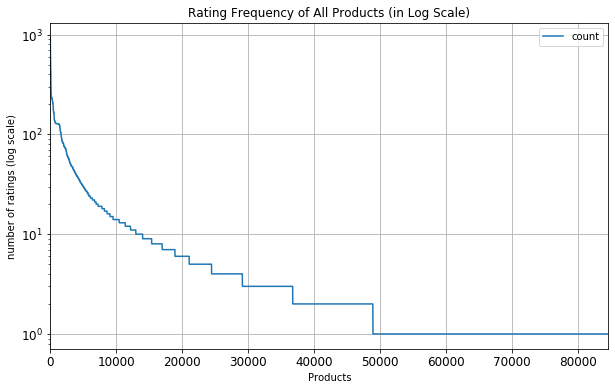

In [18]:
# plot rating frequency of all movies in log scale
ax = data.sort_values('count', ascending=False).reset_index(drop=True)
ax.plot(figsize=(10, 6),title='Rating Frequency of All Products (in Log Scale)',fontsize=12,logy=True)
plot.gca().grid(which='major')
plot.xlabel("Products")
plot.ylabel("number of ratings (log scale)")